<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/lab36_decisiontree_titanic_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉
데이터
--

훈련 데이터https://bit.ly/2WflH16
 테스트 데이터  https://bit.ly/2ZS7hGc


## 속성 데이터

- Survival - 생존여부: 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
!curl -L https://bit.ly/2WflH16 -o titanic_train.csv
!curl -L https://bit.ly/2ZS7hGc -o titanic_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   112  100   112    0     0    823      0 --:--:-- --:--:-- --:--:--   829
100   125  100   125    0     0    328      0 --:--:-- --:--:-- --:--:--   328
100    17  100    17    0     0     15      0  0:00:01  0:00:01 --:--:--     0
100 61194  100 61194    0     0  37468      0  0:00:01  0:00:01 --:--:--  703k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   111  100   111    0     0    403      0 --:--:-- --:--:-- --:--:--   405
100   124  100   124    0     0    206      0 --:--:-- --:--:-- --:--:--   206
100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01     0
100 28629  100 28629    0     0  18765      0  0:00:01  0:00:01 --:--:-- 18765


In [2]:
!cat titanic_train.csv | head -n 5

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [3]:
!cat titanic_test.csv | head -n 5

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S


In [4]:
import pandas as pd

train = pd.read_csv("./titanic_train.csv", index_col=["PassengerId"])
test = pd.read_csv("./titanic_test.csv", index_col=["PassengerId"])

In [5]:
train.columns, test.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
# 성별을 구분하는 컬럼을 추가해본다

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

In [7]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0


In [8]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Sex_encode  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Ticket      418 non-null    object 
 7   Fare        417 non-null    float64
 8   Cabin       91 non-null     object 
 9   Embarked    418 non-null    object 
 10  Sex_encode  418 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


- 결측치가 눈에 보인다.

## 비어 있는 요금 항목을 찾아본다

In [11]:
train.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [12]:
test.isna().sum()

,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [13]:
# 비어 있는 요금 항목을, 요금의 평균치로 대체한다
mean_fare = train["Fare"].mean()
print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [14]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Categorical feature ('Embarked')

In [15]:
train["Embarked"].value_counts()  # C = Cherbourg, Q = Queenstown, S = Southampton

,count
Embarked,
S,644
C,168
Q,77


In [16]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")
print(train_embarked.shape)
train_embarked.head(3)

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True


In [17]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")
print(test_embarked.shape)
test_embarked.head(3)

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,False,True,False
893,False,False,True
894,False,True,False


In [18]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,False,False,True
2,C,True,False,False
3,S,False,False,True
4,S,False,False,True
5,S,False,False,True


In [19]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,False,True,False
893,S,False,False,True
894,Q,False,True,False
895,S,False,False,True
896,S,False,False,True


## Train

In [20]:
feature_names = ["Pclass", "Sex_encode", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,0.0,7.2500,False,False,True
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,False,True
4,1,1.0,53.1000,False,False,True
5,3,0.0,8.0500,False,False,True


In [21]:
y_train = train["Survived"]

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

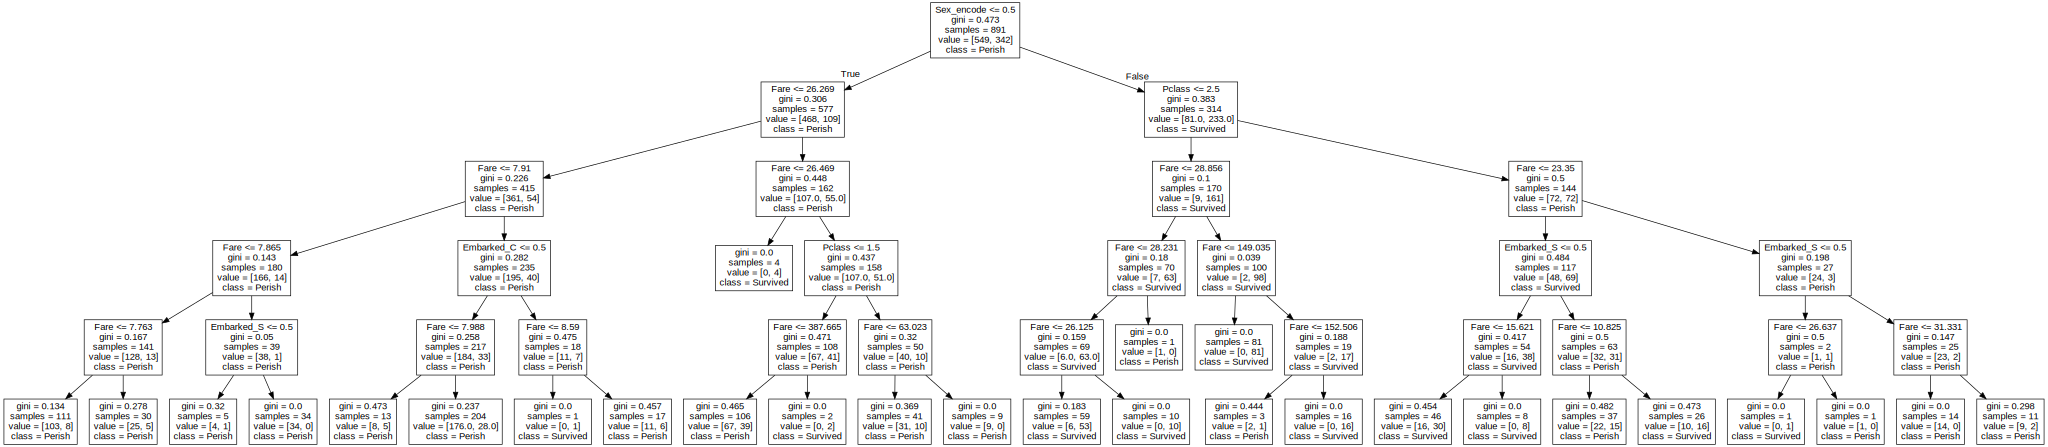

In [24]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## Predict

In [25]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,False,True,False
893,3,1.0,7.0000,False,False,True
894,2,0.0,9.6875,False,True,False
895,3,0.0,8.6625,False,False,True
896,3,1.0,12.2875,False,False,True


In [26]:
prediction = model.predict(X_test)

submission = pd.DataFrame({      # kaggle contest 에 제출할 데이터
    "PassengerId": test.index,
    "Survived": prediction
}).reset_index(drop=True)

In [27]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Altogether

In [28]:
from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv("./titanic_train.csv", index_col=["PassengerId"])
test = pd.read_csv("./titanic_test.csv", index_col=["PassengerId"])

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

mean_fare = train["Fare"].mean()
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")
train = pd.concat([train, train_embarked], axis=1)
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")
test = pd.concat([test, test_embarked], axis=1)

feature_names = ["Pclass", "Sex_encode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train, y_train = train[feature_names], train["Survived"]
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

X_test = test[feature_names]
prediction = model.predict(X_test)

submission = pd.DataFrame({      # kaggle contest 에 제출할 데이터
    "PassengerId": test.index,
    "Survived": prediction
}).reset_index(drop=True)

# print(submission.head(10))
submission.to_csv("submission.csv", index=False)

In [29]:
!cat submission.csv | head -n 10

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 1) 데이터 로드
train = pd.read_csv("./titanic_train.csv", index_col="PassengerId")
test  = pd.read_csv("./titanic_test.csv",  index_col="PassengerId")

# 2) 기본 결측치 처리 (학습/평가 일관)
# Embarked: 최빈값으로
embarked_mode = train["Embarked"].mode().iloc[0]
train["Embarked"] = train["Embarked"].fillna(embarked_mode)
test["Embarked"]  = test["Embarked"].fillna(embarked_mode)

# Fare: 평균으로 (train/test 모두)
fare_mean = train["Fare"].mean()
train["Fare"] = train["Fare"].fillna(fare_mean)
test["Fare"]  = test["Fare"].fillna(fare_mean)

# Sex: 결측이 있다면 임시로 'male'로 채움(혹은 가장 빈도 높은 값)
sex_mode = train["Sex"].mode().iloc[0]
train["Sex"] = train["Sex"].fillna(sex_mode)
test["Sex"]  = test["Sex"].fillna(sex_mode)

# 3) 성별 인코딩
train["Sex_encode"] = (train["Sex"] == "female").astype(int)
test["Sex_encode"]  = (test["Sex"]  == "female").astype(int)

# 4) Embarked 더미 일치화 (train/test 컬럼 동일하게 강제)
emb_cols = ["Embarked_C", "Embarked_Q", "Embarked_S"]
train = pd.concat([train, pd.get_dummies(train["Embarked"], prefix="Embarked")], axis=1)
test  = pd.concat([test,  pd.get_dummies(test["Embarked"],  prefix="Embarked")], axis=1)

# 누락된 더미 칼럼을 0으로 채워 정렬
for df in (train, test):
    for c in emb_cols:
        if c not in df.columns:
            df[c] = 0
train = train
test  = test

# 5) 피처/타깃 정의
feature_names = ["Pclass", "Sex_encode", "Fare"] + emb_cols
X_train, y_train = train[feature_names], train["Survived"]

# 6) 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 7) 예측 및 제출파일 생성
X_test = test[feature_names]
pred = model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": pred
}).reset_index(drop=True)

print(submission.head(10))
# submission.to_csv("submission.csv", index=False)


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


-----------------------------